In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_threat_data (1).csv to merged_threat_data (1).csv


**IMPORTING LIBRARIES**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

**Load the merged dataset**


In [ ]:
df = pd.read_csv("merged_threat_data (1).csv")

<ipython-input-3-286442978ff7>:1: DtypeWarning: Columns (3,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_threat_data (1).csv")


In [ ]:
print(df.head())


                 TimeCreated        Id  ProviderName LogName Label  \
1041570  2014-11-22 03:27:34  1.000000             3     NaN  DDoS   
1041571  2014-11-22 03:27:34  0.980214             5     NaN  DDoS   
1041572  2014-11-22 03:27:35  0.002116            17     NaN  DDoS   
1041573  2014-11-22 03:27:36  0.000235            15     NaN  DDoS   
1041574  2015-07-10 22:22:57  0.002116            17     NaN  DDoS   

         Label_encoded  LevelDisplayName  \
1041570              0                 2   
1041571              0                 2   
1041572              0                 2   
1041573              0                 2   
1041574              0                 2   

                                                   Message  \
1041570  DHCPv6 client service is stopped. ShutDown Fla...   
1041571  DHCPv4 client service is stopped. ShutDown Fla...   
1041572  The kernel power manager has initiated a shutd...   
1041573  The operating system is shutting down at syste...   
1041

**Encode categorical columns**

In [ ]:
le = LabelEncoder()
df['ProviderName'] = le.fit_transform(df['ProviderName'])
df['LevelDisplayName'] = le.fit_transform(df['LevelDisplayName'])

**Class distribution**

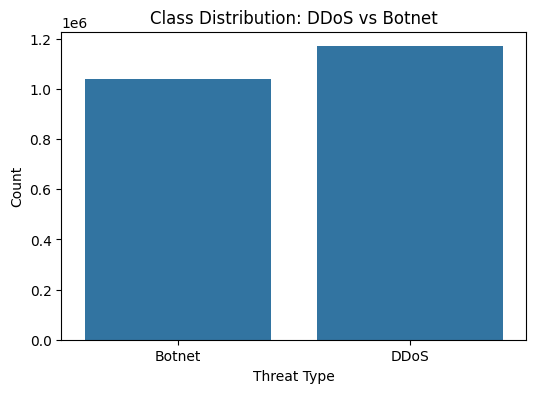

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title("Class Distribution: DDoS vs Botnet")
plt.xlabel("Threat Type")
plt.ylabel("Count")
plt.show()


** Feature correlation heatmap**

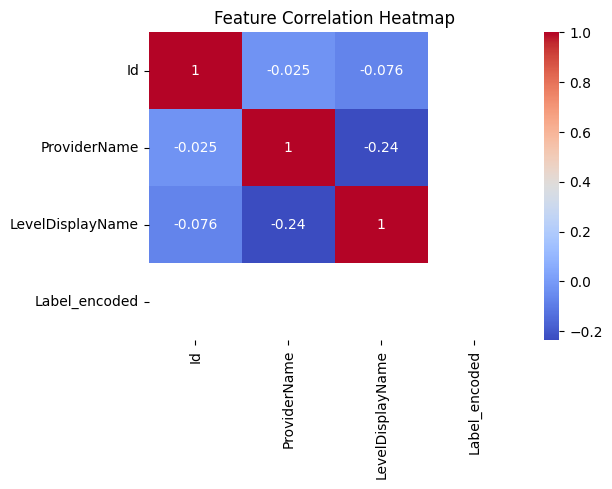

In [ ]:
corr = df[['Id', 'ProviderName', 'LevelDisplayName', 'Label_encoded']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Prepare features and labels**

In [ ]:
X = df[['Id', 'ProviderName', 'LevelDisplayName']]
y = df['Label_encoded']

**Train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Predict**

In [ ]:
y_pred = rf.predict(X_test)

**Classification report**

In [ ]:
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["DDoS", "Botnet"]))

📊 Classification Report:
              precision    recall  f1-score   support

        DDoS       1.00      1.00      1.00    351087
      Botnet       1.00      1.00      1.00    312474

    accuracy                           1.00    663561
   macro avg       1.00      1.00      1.00    663561
weighted avg       1.00      1.00      1.00    663561



**Confusion matrix**

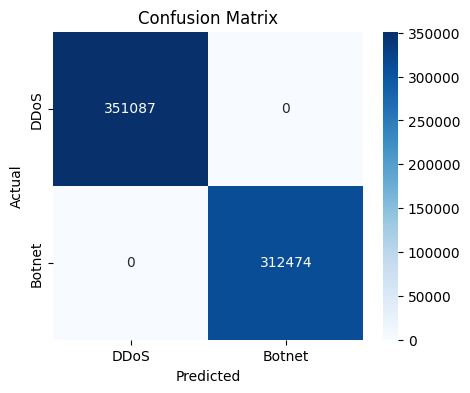

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["DDoS", "Botnet"], yticklabels=["DDoS", "Botnet"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Feature importance**

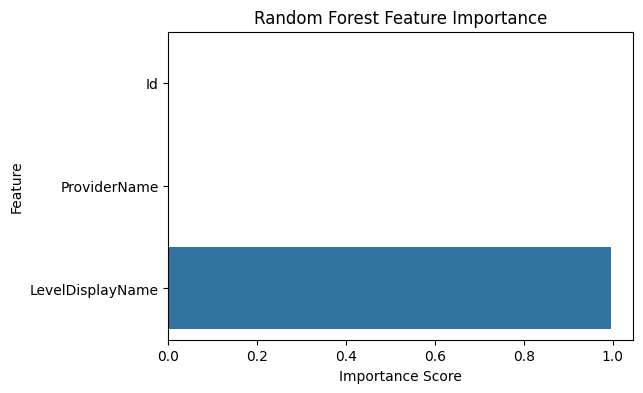

In [ ]:
importances = rf.feature_importances_
features = ['Id', 'ProviderName', 'LevelDisplayName']
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
# View a few sample cleaned messages
df['Message_cleaned'].dropna().sample(10).tolist()


['the amazon ssm agent service terminated unexpectedly  it has done this 45 times  the following corrective action will be taken in 30000 milliseconds restart the service',
 'the amazon ssm agent service terminated with the following servicespecific error \r\nincorrect function',
 'the amazon ssm agent service terminated unexpectedly  it has done this 543 times  the following corrective action will be taken in 30000 milliseconds restart the service',
 'the amazon ssm agent service terminated unexpectedly  it has done this 179 times  the following corrective action will be taken in 30000 milliseconds restart the service',
 'the amazon ssm agent service entered the stopped state',
 'the windows update service entered the stopped state',
 'the amazon ssm agent service terminated unexpectedly  it has done this 200 times  the following corrective action will be taken in 30000 milliseconds restart the service',
 'the amazon ssm agent service terminated with the following servicespecific erro

**CNN-LSTM Model for Text Classification**

In [ ]:

#  Text Preprocessing

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Drop nulls and extract text + labels
df = df.dropna(subset=['Message_cleaned'])
texts = df['Message_cleaned'].astype(str).tolist()
labels = df['Label_encoded'].tolist()

# Tokenization
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



**CNN-LSTM Model**

In [ ]:

#CNN-LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=embedding_dim))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build model to view summary
model.build(input_shape=(None, X_train.shape[1]))
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 96, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 48, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,354,113 (5.17 MB)

 Trainable params: 1,354,113 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the Model

history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/3
5121/5121 ━━━━━━━━━━━━━━━━━━━━ 949s 185ms/step - accuracy: 0.9995 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 1.3940e-07
Epoch 2/3
5121/5121 ━━━━━━━━━━━━━━━━━━━━ 1015s 191ms/step - accuracy: 1.0000 - loss: 8.8216e-07 - val_accuracy: 1.0000 - val_loss: 4.0856e-09
Epoch 3/3
5121/5121 ━━━━━━━━━━━━━━━━━━━━ 1008s 196ms/step - accuracy: 1.0000 - loss: 8.2482e-08 - val_accuracy: 1.0000 - val_loss: 1.1014e-10


In [ ]:
# Sample 600 entries evenly from both classes (300 DDoS, 300 Botnet)
benchmark_df = df.groupby('Label_encoded').apply(lambda x: x.sample(n=300, random_state=42)).reset_index(drop=True)


<ipython-input-24-9c1bbc6d269e>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  benchmark_df = df.groupby('Label_encoded').apply(lambda x: x.sample(n=300, random_state=42)).reset_index(drop=True)


In [ ]:
benchmark_df.to_csv('benchmark_threat_dataset.csv', index=False)


In [ ]:
print(benchmark_df.head())


           TimeCreated        Id  ProviderName LogName Label  Label_encoded  \
0  2018-02-12 03:45:09  0.137582            35     NaN  DDoS              0   
1  2018-02-13 00:06:44  0.137719            35     NaN  DDoS              0   
2  2018-02-12 18:52:37  0.137719            35     NaN  DDoS              0   
3  2018-02-12 23:31:43  0.137817            35     NaN  DDoS              0   
4  2018-02-11 15:25:53  0.137817            35     NaN  DDoS              0   

   LevelDisplayName                                            Message  \
0                 1  The Amazon SSM Agent service terminated with t...   
1                 1  The Amazon SSM Agent service terminated unexpe...   
2                 1  The Amazon SSM Agent service terminated unexpe...   
3                 2  The CDPUserSvc_251cd service entered the runni...   
4                 2  The Amazon SSM Agent service entered the stopp...   

                                     Message_cleaned  
0  the amazon ssm agent s

In [ ]:
from google.colab import files
files.download('benchmark_threat_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>